# Projeto House Rocket

Metodo Crisp

In [1]:
!pip install folium
!pip install geopandas

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     -------------------------------------- 21.7/21.7 MB 817.6 kB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 935.3 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.6 MB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)


# Imports

In [2]:
import pandas as  pd
import numpy as np
import inflection
import streamlit
import math
import seaborn as sb
import random
import pickle
import folium
import geopandas
import warnings
from datetime import datetime

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

## Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sb.set()

In [4]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
# Remove a exibição de notação científica
pd.set_option('float_format', '{:.2f}'.format)

In [6]:
# Arredonda duas casas decimais
pd.set_option('display.precision', 2)

## 0.2 Loading Data

In [7]:
# import dataset
data = pd.read_csv(r'C:\Users\alexa\Documents\repos\house_rocket\house-rocket-analitycs\data\kc_house_data.csv')
data_raw = data.copy()

# Descrição dos dados

## Rename Columns

In [8]:
data_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data_raw['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [10]:
#cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
#       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
#       'CompetitionDistance', 'CompetitionOpenSinceMonth',
#       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
#       'Promo2SinceYear', 'PromoInterval']
#
## Função para alterar as letras para minusculas
#
#snakecase = lambda x: inflection.underscore (x)
#
#cols_new = list( map ( snakecase, cols_old))
#
#df1.columns = cols_new

In [11]:
df1 = data_raw

## Data Dimensions

In [12]:
print ('Number of Rows: {}' .format ( df1.shape[0]))
print ('Number of Cols: {}' .format ( df1.shape[1]))

Number of Rows: 21613
Number of Cols: 21


## Data Types

In [13]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check NA

In [14]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Check variables

In [15]:

df1['yr_built'] = pd.to_datetime(df1['yr_built'], format = '%Y')
df1['yr_renovated'] = df1['yr_renovated'].astype(str)
df1['yr_renovated'] = df1['yr_renovated'].replace('0', '1900') # PREMISSA: quando não há reforma, ano da reforma é '1900'
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated']).dt.strftime('%Y')
#df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format = '%Y')


In [16]:
df1['yr_renovated'] = df1['yr_renovated'].astype(str)
df1['yr_renovated'] = df1['yr_renovated'].replace('0', '1900') # PREMISSA: quando não há reforma, ano da reforma é '1900'
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format = '%Y')


In [17]:
#transformation

#Convert variables to datetime
df1['date'] = pd.to_datetime( df1['date'] )

# Converte de 'int' para 'datetime' no formato YYYY-MM-DD
#data['yr_built'] = data['yr_built'].astype(str)
#data['yr_built'] = pd.to_datetime(data['yr_built']).dt.strftime('%Y')

df1['yr_renovated'] = df1['yr_renovated'].astype(str)
df1['yr_renovated'] = df1['yr_renovated'].replace('0', '1900') # PREMISSA: quando não há reforma, ano da reforma é '1900'
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated']).dt.strftime('%Y')

#df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()

# Converte do tipo float64 para int
df1['bathrooms'] = df1['bathrooms'].astype(int)
df1['floors'] = df1['floors'].astype(int)

In [18]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built         datetime64[ns]
yr_renovated             object
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Descriptive Statistics

In [19]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )



In [20]:
# Central Tendency - mean , median
# Dispersion - std, min, max, range, skew, kurtosis

### Numerical Atributes

In [21]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
4,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
5,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
6,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
7,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
8,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19
9,sqft_above,290.00,9410.00,9120.00,1788.40,NaN,828.11,1.45,3.40


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

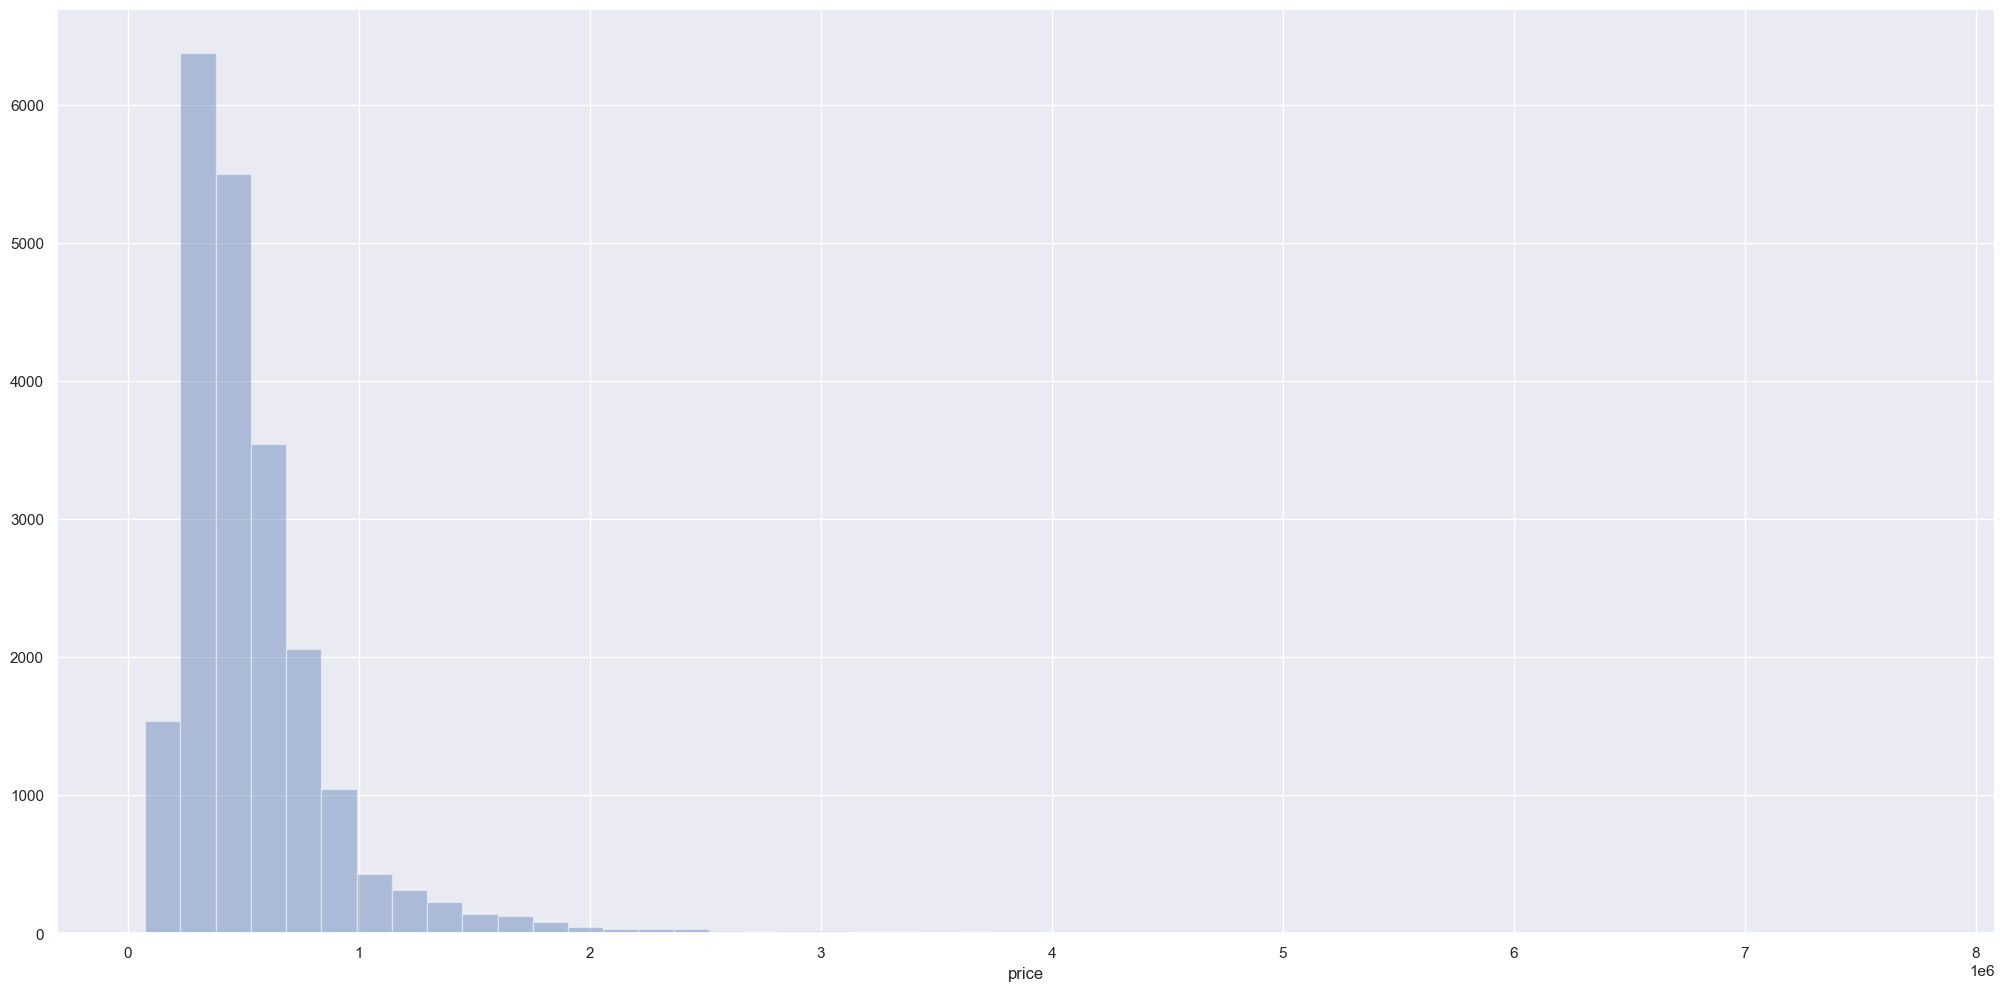

In [22]:
sb.distplot( df1['price'], kde=False )

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

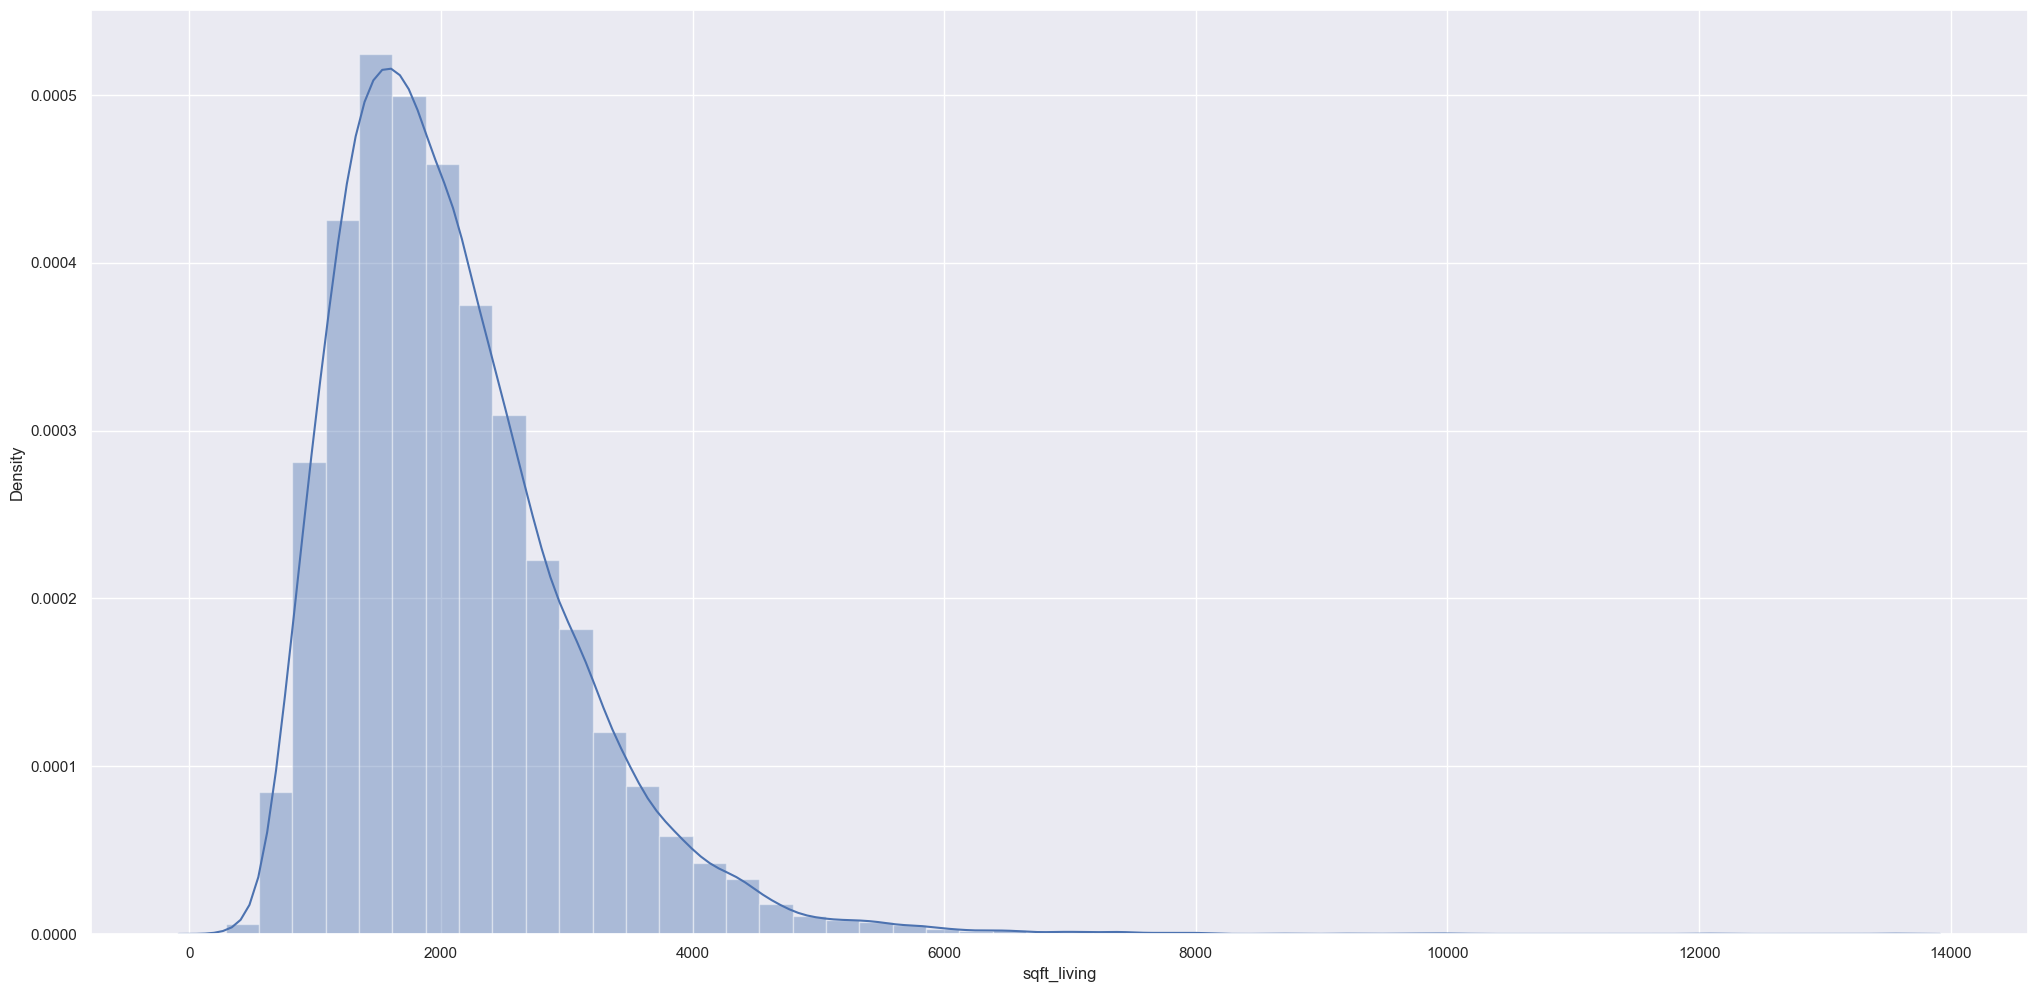

In [23]:
sb.distplot( df1['sqft_living'])

In [24]:
## sempre verificar os valores

## min, max e o range entre eles dão uma noção do atributo
## média e mediana próximas mostram que a distribuição está próxima da normal. Se estiverem distantes, temos outliers ou uma distribuição desbalanceada (poison ou outra)
## Skewness é uma métrica de simetria. quanto mais próxima de 0, mais simétrico é o dado.
## Kurtosis 

## Categorical Atributes

In [25]:
# o dataset não contém variáveis categóricas

## Identify and work with Outliers

In [26]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
maxim = pd.DataFrame(num_attributes.apply(np.max))
minim = pd.DataFrame(num_attributes.apply(np.min))
df_outlier = pd.concat([maxim, minim], axis=1).reset_index()
df_outlier.columns = ['ATTRIBUTES', 'MAX', 'MIN']
#print(df1)

In [27]:
print(df_outlier)

       ATTRIBUTES           MAX        MIN
0              id 9900000190.00 1000102.00
1           price    7700000.00   75000.00
2        bedrooms         33.00       0.00
3       bathrooms          8.00       0.00
4     sqft_living      13540.00     290.00
5        sqft_lot    1651359.00     520.00
6          floors          3.50       1.00
7      waterfront          1.00       0.00
8            view          4.00       0.00
9       condition          5.00       1.00
10          grade         13.00       1.00
11     sqft_above       9410.00     290.00
12  sqft_basement       4820.00       0.00
13       yr_built       2015.00    1900.00
14   yr_renovated       2015.00       0.00
15        zipcode      98199.00   98001.00
16            lat         47.78      47.16
17           long       -121.31    -122.52
18  sqft_living15       6210.00     399.00
19     sqft_lot15     871200.00     651.00


In [28]:
#comments

#bedrooms = 33, possível outlier




#notes:
# 33 bedrooms
# sqft loft higher than 1KK


In [29]:
df1.loc[df1['bedrooms'] == df1['bedrooms'].max(), ['id', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

,id,bedrooms,sqft_lot,floors,sqft_above,sqft_basement
15870,2402100895,33,6000,1,1040.00,580


In [30]:
df1.loc[df1['bedrooms'] == 33, 'bedrooms'] = 3 # PREMISSA: o '33' foi erro de digitação. O correto é '3'

# Feature Engineering

## Mapa Mental de Hipóteses

### Criação das Hipóteses

In [31]:
df2 = df1

### Hipóteses Loja

#### H1 - Imóveis com vista para água, na mediana, são 50% mais caros! - Done

Verdadeiro. Os Imóveis com vista para água são mais de 100% mais caros.


#### H2 - Casas com a data de construção igual ou menor que 1955 são mais barato que a mediana do preço.

Não relevante. o número de imóveis mais baratos e mais caros ficou praticamente igual, não apresentando grande influência no preço.

#### H3 - Imóveis com a maior área total são mais caros - Pending

#### H4 - Imóveis reformados recentemente (acima de 1990) tem valor mais alto - Pending

#### H5 - Imóveis de 3 banheiros tem um crescimento de MoM de 15% - Pending

#### H6 - O crescimento do preço dos imóveis YoY é de 10% - Pending

#### H7 - A maioria das casas com 3 quartos são acima da mediana do preço. - Pending

#### H8 - Imóveis com mais quartos são mais caros.

#### H9 - Imóveis com segundo andar são mais caros.

#### H10 - Casas tem preço médio maior que apartamentos.

#### H11 - O período do ano influencia no preço de venda.

In [32]:
# HIPÓTESE 01 - IMÓVEIS COM VISTA PARA ÁGUA SÃO 50% MAIS CARAS QUE A MEDIANA

h1 = df2[(df2['waterfront'] == 1) & (df2['price'] > df2['price'].median())]
h1['%_acima_mediana'] = ((h1['price'] / df2['price'].median()-1)*100)

print('Quantidade de casas com vista para a água : {} unidades'
      .format(len(h1)))


print('Quantidade de casas com vista para a água que não são 50% mais caras que a mediana do preço: {} unidades'
      .format(len(h1[h1['%_acima_mediana'] > 50.00])))


h1[['price', '%_acima_mediana']]

Quantidade de casas com vista para a água : 152 unidades
Quantidade de casas com vista para a água que não são 50% mais caras que a mediana do preço: 130 unidades


C:\Users\alexa\AppData\Local\Temp\ipykernel_6648\636446377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1['%_acima_mediana'] = ((h1['price'] / df2['price'].median()-1)*100)


,price,%_acima_mediana
49,1350000.00,200.00
230,655000.00,45.56
246,2400000.00,433.33
300,3075000.00,583.33
457,705000.00,56.67
540,2125000.00,372.22
656,3070000.00,582.22
1081,825000.00,83.33
1152,1955000.00,334.44
1157,790000.00,75.56


In [33]:
# HIPÓTESE 02 - Casas com a data de construção igual ou menor que 1955 são mais barato que a mediana do preço.
h2 = df2

In [34]:
#h2 = df2[(df2['yr_built'] <= 1955) & (df2['price'] <= df2['price'].median())]
h2 = df2[(df2['yr_built'] <= "1955-01-01")]
h2['%_mediana'] = ((h2['price'] / df2['price'].median()-1)*100)

print('Quantidade de casas abaixo de 1955 e com preço maior que a mediana: {} unidades'
      .format(sum(h2['%_mediana'] > 0)))
print('Quantidade de casas abaixo de 1955 e com preço igual a mediana: {} unidades'
      .format(sum(h2['%_mediana'] == 0)))
print('Quantidade de casas abaixo de 1955 e com preço menor que a mediana: {} unidades'
      .format(sum(h2['%_mediana'] < 0)))

h2[['yr_built', 'price', '%_mediana']].head(10)

Quantidade de casas abaixo de 1955 e com preço maior que a mediana: 3192 unidades
Quantidade de casas abaixo de 1955 e com preço igual a mediana: 64 unidades
Quantidade de casas abaixo de 1955 e com preço menor que a mediana: 3179 unidades


C:\Users\alexa\AppData\Local\Temp\ipykernel_6648\510800360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['%_mediana'] = ((h2['price'] / df2['price'].median()-1)*100)


,yr_built,price,%_mediana
0,1955-01-01,221900.00,-50.69
1,1951-01-01,538000.00,19.56
2,1933-01-01,180000.00,-60.00
11,1942-01-01,468000.00,4.00
12,1927-01-01,310000.00,-31.11
14,1900-01-01,530000.00,17.78
17,1916-01-01,485000.00,7.78
18,1921-01-01,189000.00,-58.00
20,1947-01-01,385000.00,-14.44
25,1941-01-01,233000.00,-48.22


## Novas Features

In [35]:
#Houses per price level
df2['level'] = df2['price'].apply( lambda x: 0 if x <= 321950 else
                                               1 if  ( x > 321950 ) & ( x <= 450000) else
                                               2 if  ( x > 450000 ) & ( x <= 645000) else '3' )

df2['level'] = df2['level'].astype(int)


#Houses per size in meters

df2['meter_living'] = df2['sqft_living'] * 0.09290304
df2['size'] = df2['meter_living'].apply( lambda x: 0 if x <= 132.57 else
                                                    1 if  ( x > 132.57 ) & ( x <= 177.44) else
                                                    2 if  ( x > 177.44 ) & ( x <= 236.90) else '3' )

df2['size'] = df2['size'].astype(int)


# Calcular o preço por metro quadrado do apartamento
df2['price_per_meter'] = df2['price'] / df2['meter_living']

#house Age
df2['house_age'] = 'NA'
df2.loc[df2['date'] > pd.to_datetime( '2014-01-01' ), 'house_age'] = 'new_house'
df2.loc[df2['date'] < pd.to_datetime( '2014-01-01' ), 'house_age'] = 'old_house'

#Dormitory Type
df2['dormitory_type'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'bedrooms'] == 1:
        df2.loc[i, 'dormitory_type'] = 'studio'
        
    elif df2.loc[i, 'bedrooms'] == 2:
        df2.loc[i, 'dormitory_type'] = 'apartment'
    
    else:
        df2.loc[i, 'dormitory_type'] = 'house'

# data dimension
print( 'Number of Rows:{}'.format( df2.shape[0] ) )
print( 'Number of Columns {}'.format( df2.shape[1] ) )

# Bad == Se a condition for menor ou igual a 2
# Regular == Se a condition for igual a 3 ou 4
# Good == Se a condition for igual 5

df2['condition_type'] = df2['condition'].apply(lambda x: 'bad' if x <= 2 else 
                                                         'regular' if (x == 3) | (x == 4) else 'good')

Number of Rows:21613
Number of Columns 27


# Análise de variaveis

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


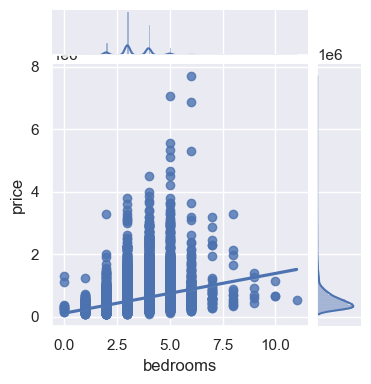

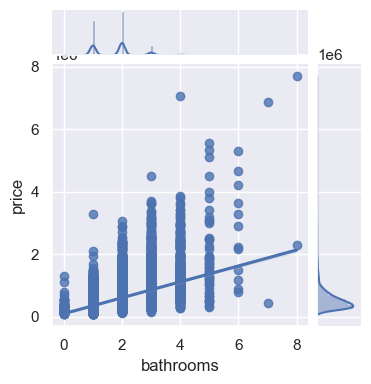

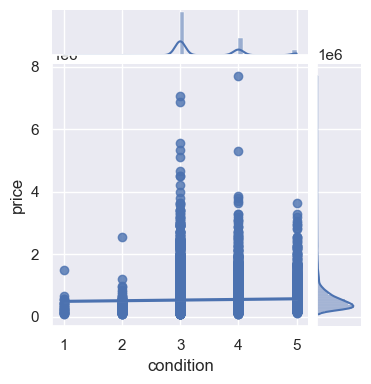

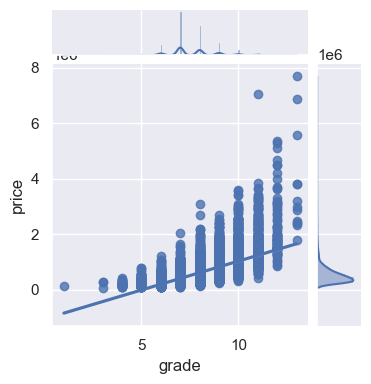

In [37]:
# Indivudal variable relationship with Price

# Linear regression between Year Built and price
# sb.jointplot(x='yr_built', y='price',data=df2,kind='reg',size=4)

# Linear regression between Year renovated and price
# sb.jointplot(x='yr_renovated',y='price',data=df2,kind='reg',size=4)


# Linear regression between Number of Bedrooms and price
sb.jointplot(x='bedrooms',y='price', data=df2, kind='reg',size=4)

# Linear regression between Number of Bathrooms and price
sb.jointplot(x='bathrooms',y='price', data=df2 ,kind='reg',size=4)

# Linear regression between condition and price
sb.jointplot(x='condition',y='price', data=df2 ,kind='reg',size=4)

# Linear regression between grade and price
sb.jointplot(x='grade',y='price', data=df2 ,kind='reg',size=4)

<AxesSubplot:>

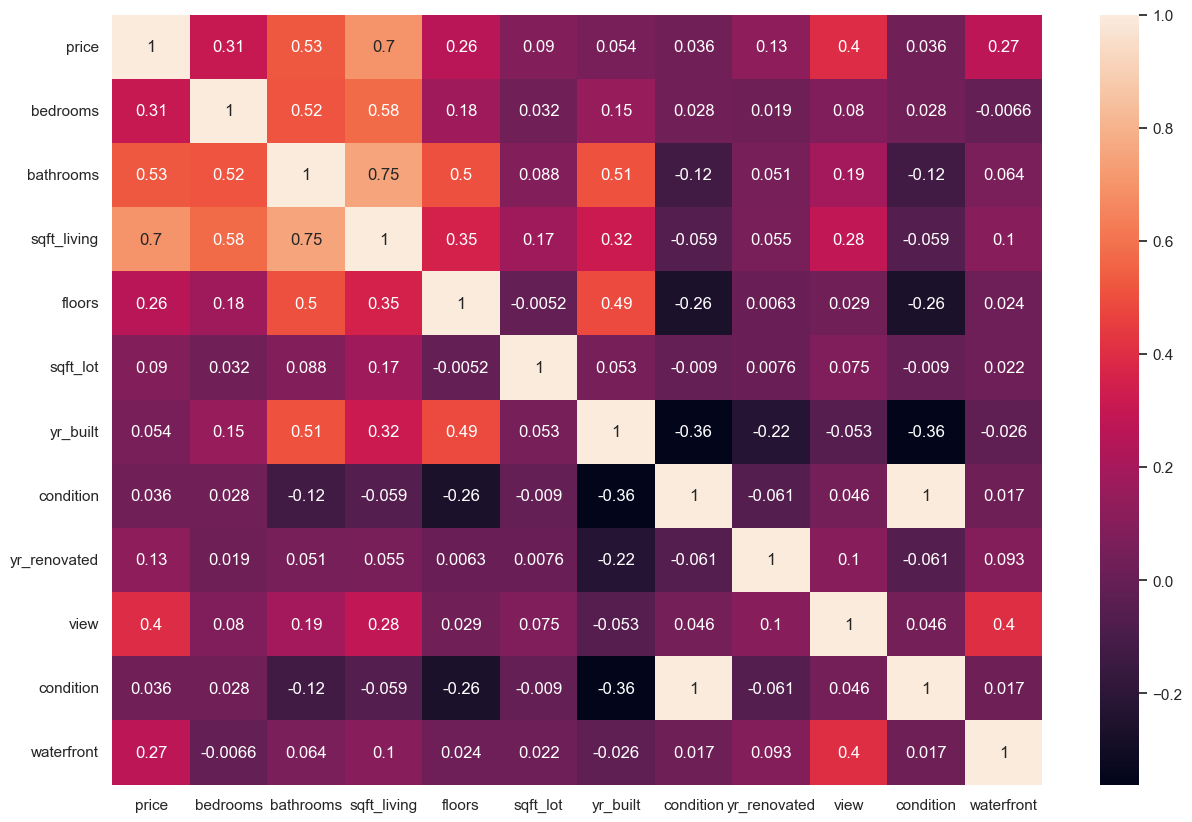

In [231]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','sqft_lot','yr_built','condition','yr_renovated','view','condition','waterfront']
sb.heatmap(data[columns].corr(),annot=True)

# Análise Exploratória dos Dados

In [232]:
df3 = df2

# Perguntas do CEO #

In [233]:
df5 = df3

## Quais imóveis a House Rocket deveria comprar? Por qual preço?

In [259]:
df3['month'] = pd.to_datetime(df5['date']).dt.strftime('%m')

In [260]:
df4 = df3[['month', 'price_per_meter', 'zipcode', 'condition', 'dormitory_type']].groupby(['zipcode', 'month', 'condition']).median().reset_index()
df4 = df4.rename(columns={'price_per_meter':'median_price_m2_by_month_zipcode_condition'})
#df2.sort_values(by='median_price_m2_by_month_zipcode_condition', ascending=False)

df5 = pd.merge(df3, df4, on=['zipcode', 'month', 'condition'], how='inner')
df5[['id', 'date', 'price', 'zipcode', 'price_per_meter', 'month', 'dormitory_type', 'condition','median_price_m2_by_month_zipcode_condition']].sample(5)

,id,date,price,zipcode,price_per_meter,month,dormitory_type,condition,median_price_m2_by_month_zipcode_condition
12241,1328300810,2015-03-30,347500.00,98058,1633.39,07,house,3,1816.64
9757,798000062,2014-08-01,286000.00,98168,1739.25,07,house,3,1739.25
17844,2450000275,2014-07-16,595000.00,98004,4744.09,09,house,4,4733.52
17279,3570000160,2014-07-10,610000.00,98075,2525.38,12,house,5,2525.38
12046,2767704603,2014-06-09,489000.00,98107,3509.03,07,house,3,3991.62


In [261]:
# comparar o price_m2 com median_price_m2_by_month_and_zipcode
# comprar aqueles com mais de 30% de desconto em relação à mediana E com condições regulares
for i in range(len(df5)):
    if (df5.loc[i,'price_per_meter'] < (0.7 * df5.loc[i,'median_price_m2_by_month_zipcode_condition'])) & ((df5.loc[i, 'condition'] >= 3) & (df5.loc[i, 'condition'] <= 4) ):
        df5.loc[i, 'status'] = 'need reform'
        df5.loc[i, 'buy_price'] = df5.loc[i, 'price']
    elif (df5.loc[i,'price_per_meter'] < (0.7 * df5.loc[i,'median_price_m2_by_month_zipcode_condition'])) & (df5.loc[i, 'condition'] > 4):
        df5.loc[i, 'status'] = 'buy'
        df5.loc[i, 'buy_price'] = df5.loc[i, 'price']
    else:
        df5.loc[i, 'status'] = 'not buy'
        #df5.loc[i, 'buy_price'] = 0.0

In [262]:
df5['status'].value_counts()

not buy        20460
need reform     1068
buy               85
Name: status, dtype: int64

In [263]:
print( 'Number of houses available to purchase and in good conditions: {}'.format( df5['status'].value_counts()['buy']))
print( 'Number of houses available to purchase and may need a reform: {}'.format( df5['status'].value_counts()['need reform']))

Number of houses available to purchase and in good conditions: 85
Number of houses available to purchase and may need a reform: 1068


## Dos imóveis que precisam de reforma, quais devemos comprar?

Os imóveis classificados com condição intermediária vão precisar de reforma para revenda.
Vamos considerar o seguinte:

Imóveis com condição 3 = Estado de preservação ruim. A reforma será mais dispendiosa. Vamos considerar gastos de até 50% do valor do imóvel em reforma

Imóveis com condição 4 = Estado de preservação intermediário. A reforma será menor, somente em alguns comodos da casa ou algum tipo especifico (piso, pintura, etc.). Vamos considerar gastos de até 30% do valor do imóvel em reforma.



In [264]:
#Preço estimado da reforma. Será acessado via aplicativo
for i in range(len(df5)):
    if ((df5.loc[i, 'condition'] == 3) ):
        df5.loc[i, 'estimated_price_reform'] = (0.5 * df5.loc[i,'price'])
    elif ((df5.loc[i, 'condition'] == 4) ):
        df5.loc[i, 'estimated_price_reform'] = (0.3 * df5.loc[i,'price'])
    else: 
        df5.loc[i, 'estimated_price_reform'] = 0.0

        

In [265]:
# Preço do imóvel com a reforma.
for i in range(len(df5)):
    if ((df5.loc[i, 'condition'] == 3) ):
        df5.loc[i, 'price_reformed'] = (1.5 * df5.loc[i,'price'])
    elif ((df5.loc[i, 'condition'] == 4) ):
        df5.loc[i, 'price_reformed'] = (1.3* df5.loc[i,'price'])
    else: 
        df5.loc[i, 'price_reformed'] = 0.0

df5['price_m2_reformed'] = df5['price_reformed'] / df5['meter_living']


In [266]:
#Nova variável criada. Se o preço do metro reformado for menor que 70% da média do metro² da região, compra direta para reformar. 
## Caso o preço esteja entre 70% e 90%, checar pessoalmente para validar a qualidade e os prováveis custos. 

for i in range(len(df5)):
    if (df5.loc[i,'price_m2_reformed'] < (0.7 * df5.loc[i,'median_price_m2_by_month_zipcode_condition'])) & ((df5.loc[i, 'status'] == 'need reform')):
        df5.loc[i, 'buy_&_reform'] = 'yes'
    elif(df5.loc[i,'price_m2_reformed'] < (0.9 * df5.loc[i,'median_price_m2_by_month_zipcode_condition'])) & ((df5.loc[i, 'status'] == 'need reform')):
        df5.loc[i, 'buy_&_reform'] = 'check_personally'
    else:    
        df5.loc[i, 'buy_&_reform'] = 'no'


In [267]:
df5['buy_&_reform'].count()

21613

In [268]:
print( 'Number of houses to buy: {}'.format( df5['status'].value_counts()['buy']))
print( 'Number of houses to buy and reform: {}'.format( df5['buy_&_reform'].value_counts()['yes']))
print( 'Number of houses to check personally: {}'.format( df5['buy_&_reform'].value_counts()['check_personally']))



Number of houses to buy: 85
Number of houses to buy and reform: 68
Number of houses to check personally: 477


## Após a compra, quando a House Rocket deve vender o imóvel e por qual preço?

In [269]:
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,meter_living,size,price_per_meter,house_age,dormitory_type,condition_type,month,median_price_m2_by_month_zipcode_condition,status,buy_price,estimated_price_reform,price_reformed,price_m2_reformed,buy_&_reform
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1,0,0,3,7,1180.00,0,1955-01-01,1900,98178,47.51,-122.26,1340,5650,0,109.63,0,2024.16,new_house,house,regular,10,1953.92,not buy,NaN,110950.00,332850.00,3036.24,no
1,2171400197,2014-09-18,350000.00,5,3,2520,5500,1,0,0,3,8,1550.00,970,2004-01-01,1900,98178,47.49,-122.25,1700,8000,1,234.12,2,1494.99,new_house,house,regular,10,1953.92,not buy,NaN,175000.00,525000.00,2242.48,no
2,179003055,2014-11-13,210000.00,3,1,1200,7500,1,0,0,3,6,1200.00,0,1905-01-01,1989,98178,47.49,-122.28,1010,7000,0,111.48,0,1883.68,new_house,house,regular,10,1953.92,not buy,NaN,105000.00,315000.00,2825.53,no
3,393000045,2014-12-26,415000.00,5,1,3700,9140,1,0,0,3,8,1850.00,1850,1957-01-01,1900,98178,47.51,-122.26,2190,6720,1,343.74,3,1207.30,new_house,house,regular,10,1953.92,need reform,415000.00,207500.00,622500.00,1810.96,no
4,7813200115,2014-09-04,100000.00,2,1,790,6426,1,0,0,3,6,790.00,0,1944-01-01,1900,98178,47.49,-122.25,1380,6946,0,73.39,0,1362.52,new_house,apartment,regular,10,1953.92,need reform,100000.00,50000.00,150000.00,2043.78,no


In [278]:
#Preço de venda definido de acordo com a classificação. Imóveis bons com 25% de aumento e imóveis medianos com reforma com 10% de aumento.
for i in range( len( df5 ) ):
    if (df5.loc[i, 'status'] == 'buy'):
        df5.loc[i, 'sales_price'] = df5.loc[i, 'price'] * 1.25
        
    elif (df5.loc[i, 'buy_&_reform'] == 'yes'):
         df5.loc[i, 'sales_price'] = df5.loc[i, 'price_reformed'] * 1.10
    
    elif (df5.loc[i, 'buy_&_reform'] == 'check_personally'):
         df5.loc[i, 'sales_price'] = df5.loc[i, 'price_reformed'] * 1.10
        
    else:
        df5.loc[i, 'sales_price'] = 0

In [288]:
# Calculando o lucro esperado por venda das compras diretas e das 

for i in range( len( df5 ) ):
    if (df5.loc[i, 'buy_&_reform'] == 'yes') or (df5.loc[i, 'buy_&_reform'] == 'check_personally'):
        df5.loc[i, 'profit'] = df5.loc[i, 'sales_price'] - df5.loc[i, 'price_reformed']*1.05
              
    elif (df5.loc[i, 'status'] == 'buy'):
         df5.loc[i, 'profit'] = df5.loc[i, 'sales_price'] - df5.loc[i, 'price']*1.05

    else:
        df5.loc[i, 'profit'] = 0

In [280]:
#
aux_1 = df5[df5['sales_price'] != 0][['id', 'price', 'zipcode', 'sales_price', 'profit']]
aux_1

,id,price,zipcode,sales_price,profit
9,7812800515,159075.00,98178,262473.75,23861.25
40,7508700085,386500.00,98125,637725.00,57975.00
133,1525069088,442500.00,98053,730125.00,66375.00
154,251300110,225000.00,98003,371250.00,33750.00
189,2899200040,242000.00,98146,399300.00,36300.00
316,1923800135,495000.00,98103,707850.00,64350.00
317,1923300135,365000.00,98103,521950.00,47450.00
342,4222310010,152500.00,98003,218075.00,19825.00
391,3621059043,293000.00,98092,483450.00,43950.00
439,3613600150,300523.00,98119,495862.95,45078.45


In [289]:
# Caluclando o preço de cada casa seguindo o preço médio da região
df5['house_price_by_median_price'] = df5.apply(lambda x: x['median_price_m2_by_month_zipcode_condition'] * x['meter_living'], axis = 1)

# Calculando a diferença do preço de venda com o preço da casa seguindo o preço médio do m² da regiao
df5['price_difference'] = df5.apply(lambda x: x['sales_price'] - x['house_price_by_median_price'], axis = 1)

In [282]:
aux_1 = df5[df5['sales_price'] != 0][['id', 'price', 'price_reformed', 'zipcode', 'sales_price', 'condition', 'house_price_by_median_price', 'price_difference', 'profit']]
aux_1

,id,price,price_reformed,zipcode,sales_price,condition,house_price_by_median_price,price_difference,profit
9,7812800515,159075.00,238612.50,98178,262473.75,3,286810.17,-24336.42,23861.25
40,7508700085,386500.00,579750.00,98125,637725.00,3,728281.25,-90556.25,57975.00
133,1525069088,442500.00,663750.00,98053,730125.00,3,1094440.43,-364315.43,66375.00
154,251300110,225000.00,337500.00,98003,371250.00,3,402845.49,-31595.49,33750.00
189,2899200040,242000.00,363000.00,98146,399300.00,3,423891.89,-24591.89,36300.00
316,1923800135,495000.00,643500.00,98103,707850.00,4,770308.09,-62458.09,64350.00
317,1923300135,365000.00,474500.00,98103,521950.00,4,674019.57,-152069.57,47450.00
342,4222310010,152500.00,198250.00,98003,218075.00,4,267411.59,-49336.59,19825.00
391,3621059043,293000.00,439500.00,98092,483450.00,3,494123.77,-10673.77,43950.00
439,3613600150,300523.00,450784.50,98119,495862.95,3,868217.82,-372354.87,45078.45


In [290]:
(aux_1['price_difference'] > 0).value_counts()


False    630
Name: price_difference, dtype: int64

In [291]:
df5.loc[df5['status'] == 'buy', 'profit'].sum()

8299123.4

In [292]:
df5.groupby('status')['profit'].sum()

status
buy            8299123.40
need reform   15199734.41
not buy              0.00
Name: profit, dtype: float64

In [293]:
df5.groupby('buy_&_reform')['profit'].sum()

buy_&_reform
check_personally   13298103.21
no                  8299123.40
yes                 1901631.21
Name: profit, dtype: float64

In [294]:
print ('Lucro previsto de casas sem reforma necessária: {}' .format ( df5.loc[df5['status'] == 'buy', 'profit'].sum()))
print ('Lucro previsto de casas que precisam de reforma: {}' .format ( df5.loc[df5['buy_&_reform'] == 'yes', 'profit'].sum()))
print ('Lucro provável de casas que necessitam de visita local precisam de reforma: {}' .format ( df5.loc[df5['buy_&_reform'] == 'check_personally', 'profit'].sum()))

Lucro previsto de casas sem reforma necessária: 8299123.4
Lucro previsto de casas que precisam de reforma: 1901631.2050000029
Lucro provável de casas que necessitam de visita local precisam de reforma: 13298103.205000019


In [295]:
df5['profit'].sum()

23498857.810000025